# Analisis exploratorio de los datos

In [3]:
#Imports necesarios
import pandas as pd 
import numpy as np
import seaborn as sns
from tools import load_isra

Utilizando las funciones anteriores vamos a construir la base de datos a partir de las plantillas:

In [4]:
final_df = load_isra(n_examples=15)


## Caracteristicas de los datos

In [5]:
#Caracteristicas

print(final_df.shape)

print(final_df.describe())

(15, 25)
              C1         C2         C3         C4         C5         C6  \
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000   
mean   29.933333  13.800000  10.800000  14.666667  14.466667  26.000000   
std     6.922702   6.981608   5.583138   5.727960   6.501282   8.434623   
min    17.000000   2.000000   2.000000   7.000000   4.000000  13.000000   
25%    26.500000   8.000000   8.000000  12.000000  10.000000  21.000000   
50%    30.000000  14.000000  11.000000  13.000000  13.000000  26.000000   
75%    33.000000  19.000000  15.000000  19.000000  19.500000  29.500000   
max    42.000000  25.000000  20.000000  25.000000  27.000000  40.000000   

              C7         F1         F2         F3  ...         F8         F9  \
count  15.000000  15.000000  15.000000  15.000000  ...  15.000000  15.000000   
mean   16.066667  19.533333  10.866667  23.666667  ...  10.666667  18.266667   
std     7.914423   9.999048   7.199868  15.564000  ...   9.232448  17.84643

# Principal Component Analisis (PCA)

Como son muchas las variables (features) en el dataset (24). Considero conveniente realizar un PCA, donde se tomen en cuenta los ejes done haya mayor variabilidad. En este caso yo tome los primeros 2. 

Despues se puede trabajar en este espacio con un algoritmo supervisado.

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = final_df.iloc[:,0:24]
y = final_df['A-type']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X))

print(X_scaled.shape)




(15, 24)


<Axes: xlabel='PC1', ylabel='PC2'>

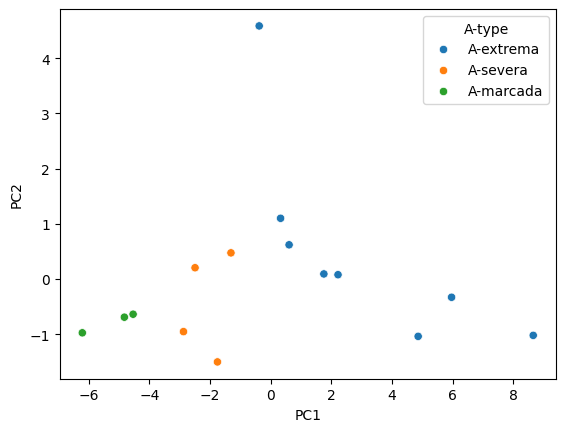

In [7]:
pca =PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])

sns.scatterplot(data=X_pca,x='PC1',y='PC2',hue=y)
